In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
final = pd.read_excel('온도총판매.xlsx', header=0, index_col=0, squeeze=True)

In [3]:
final.head()

평균기온
 1.8    202894
 6.5    180455
 5.8    174814
 2.3    151354
-2.2    154348
Name: 총합, dtype: int64

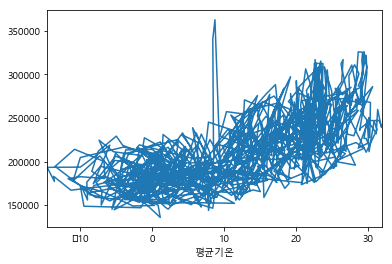

In [4]:
final.plot()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


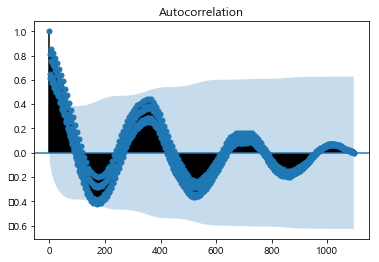

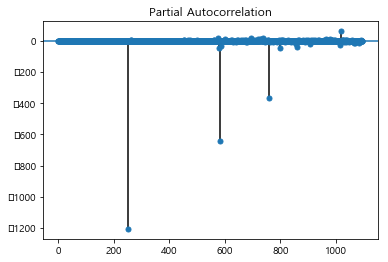

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(final)
plot_pacf(final)
plt.show()

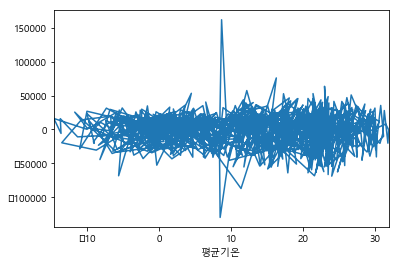

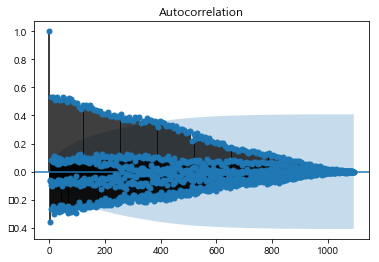

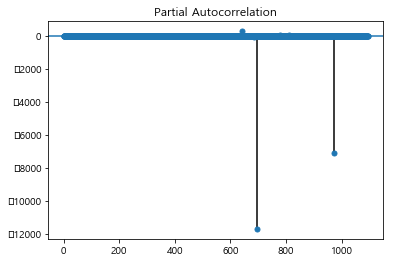

In [6]:
diff_1=final.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(final, order=(5,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D.총합   No. Observations:                 1095
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -12243.627
Method:                       css-mle   S.D. of innovations          17347.644
Date:                Mon, 15 Jul 2019   AIC                          24503.253
Time:                        21:14:33   BIC                          24543.242
Sample:                             1   HQIC                         24518.385
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.2034    114.720     -0.098      0.922    -236.050     213.643
ar.L1.D.총합    -0.0278      0.037     -0.750      0.454      -0.100       0.045
ar.L2.D.총합    -0.5241      0.026    -20.481      0.0

In [8]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(final, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.총합   No. Observations:                 1095
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12539.922
Method:                       css-mle   S.D. of innovations          22753.204
Date:                Mon, 15 Jul 2019   AIC                          25083.843
Time:                        21:14:48   BIC                          25093.840
Sample:                             1   HQIC                         25087.626
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.총합    -0.8493      0.016    -53.429      0.000      -0.880      -0.818
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


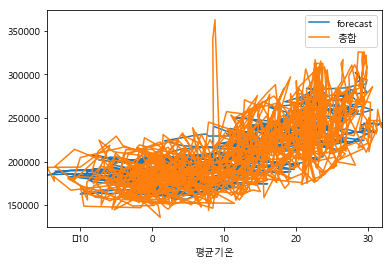

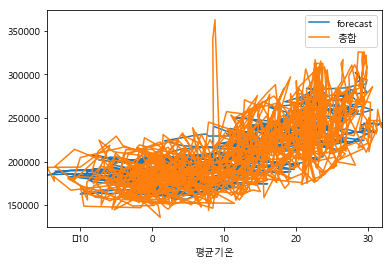

In [9]:
model_fit.plot_predict()

In [10]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([164579.75590784]), array([22753.20422674]), array([[119984.29509056, 209175.21672513]]))
